<h1 style="color: green;">Regression modelling Home Shopping Expenditure per week</h1>
<p>
The following tasks are accomplished in this section:
<ul>
<li>Hyperparameter tuning with GridSearchCV</li>
<li>Retrieving the best parameters for the top 4 models from GridSearchCV</li>
<li>Comparing VotingRegressor with the best model using cross validation</li>
<li>Working with the best model</li>
<li>Feature importance of the best model</li>
<li>Exporting the best model for evaluation</li>
</ul>

</p>

<h1 style="color: green;">Import libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestRegressor as rf_r
from sklearn.ensemble import GradientBoostingRegressor as gb_r
from sklearn.ensemble import AdaBoostRegressor as adb_r
from xgboost import XGBRegressor as xgb_r
from catboost import CatBoostRegressor as catb_r
from lightgbm import LGBMRegressor as lgbm_r

from sklearn.ensemble import VotingRegressor as vot_r


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


# Feature selection
from sklearn.feature_selection import SelectFromModel


import joblib

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green;">Load the data</h1>

In [2]:
X_train = pd.read_csv("../2. Data/homeshopping_Regressor_X_train.csv")
X_test = pd.read_csv("../2. Data/homeshopping_Regressor_X_test.csv")

In [3]:
X_train.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Total_Exp_wk_perc,hour,Drinks,Bread_wk,Bread_exp_wk,...,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning,target
0,-0.839123,-0.116272,-0.516401,-0.786982,-2.325070,0.958724,-0.281813,-0.540089,-1.338859,-0.489901,...,-0.456258,-0.484347,-0.299122,2.461060,-0.387298,-0.419686,1.031079,-0.373429,-0.709670,-0.360978
1,1.789132,0.101658,0.463288,-0.504160,-0.999776,1.714483,-0.534346,0.589188,-0.415046,0.897160,...,-0.456258,2.064634,-0.299122,-0.406329,-0.387298,-0.419686,-0.969858,-0.373429,1.409105,-0.316871
2,-0.138255,-0.131116,-0.516401,-1.352626,-1.467527,1.564838,0.728321,-0.540089,-0.415046,-0.489901,...,-0.456258,-0.484347,-0.299122,-0.406329,-0.387298,2.382734,1.031079,-0.373429,-0.709670,-0.392313
3,1.088264,-0.164677,0.789851,-0.504160,-0.999776,1.297044,1.485921,0.589188,-0.415046,-0.120018,...,-0.456258,-0.484347,-0.299122,2.461060,-0.387298,-0.419686,-0.969858,2.677882,-0.709670,-0.396774
4,-0.839123,-0.131116,-0.516401,-0.221339,0.247559,0.049752,-1.291946,-0.540089,0.508766,-0.489901,...,-0.456258,-0.484347,-0.299122,-0.406329,2.581989,-0.419686,-0.969858,-0.373429,1.409105,-0.278559


In [4]:
# Extract y_train and y_test from X_train and X_test
y_train = X_train.target.values
y_test = X_test.target.values

# drop y_train and y_test from X_train and X_test
X_train.drop(['target'], axis=1, inplace=True)
X_test.drop(['target'], axis=1, inplace=True)

In [5]:
X_train.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Total_Exp_wk_perc,hour,Drinks,Bread_wk,Bread_exp_wk,...,Week_day_name_Friday,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning
0,-0.839123,-0.116272,-0.516401,-0.786982,-2.325070,0.958724,-0.281813,-0.540089,-1.338859,-0.489901,...,-0.392779,-0.456258,-0.484347,-0.299122,2.461060,-0.387298,-0.419686,1.031079,-0.373429,-0.709670
1,1.789132,0.101658,0.463288,-0.504160,-0.999776,1.714483,-0.534346,0.589188,-0.415046,0.897160,...,-0.392779,-0.456258,2.064634,-0.299122,-0.406329,-0.387298,-0.419686,-0.969858,-0.373429,1.409105
2,-0.138255,-0.131116,-0.516401,-1.352626,-1.467527,1.564838,0.728321,-0.540089,-0.415046,-0.489901,...,-0.392779,-0.456258,-0.484347,-0.299122,-0.406329,-0.387298,2.382734,1.031079,-0.373429,-0.709670
3,1.088264,-0.164677,0.789851,-0.504160,-0.999776,1.297044,1.485921,0.589188,-0.415046,-0.120018,...,-0.392779,-0.456258,-0.484347,-0.299122,2.461060,-0.387298,-0.419686,-0.969858,2.677882,-0.709670
4,-0.839123,-0.131116,-0.516401,-0.221339,0.247559,0.049752,-1.291946,-0.540089,0.508766,-0.489901,...,-0.392779,-0.456258,-0.484347,-0.299122,-0.406329,2.581989,-0.419686,-0.969858,-0.373429,1.409105


<h1 style="color: green;">Hyperparameter tuning with GridSearchCV</h1>

In [6]:
keys = ['AdaBoost','Catboost','LightGBM','GradientBoosting','RandomForest','XGBoost']

models_list = {
    'AdaBoost': adb_r(),
    'Catboost': catb_r(),
    'LightGBM': lgbm_r(),
    'GradientBoosting': gb_r(),
    'RandomForest': rf_r(),
    'XGBoost':xgb_r()
}

param_list = {
    'AdaBoost': {
                'n_estimators': [100, 300, 500, 800, 1000, 1500, 5000, 10000],
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'loss': ['linear','square'],
                'random_state': [44]
    },
    
    'Catboost': {
                'n_estimators': [100, 300, 500, 800, 1000, 1500, 5000, 10000],                
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'depth': [4, 6, 8],
                'verbose': [False],
                'random_seed': [44]
    },
    
    'LightGBM':{
                'n_estimators': [100, 300, 500, 800, 1000, 1500, 5000, 10000],
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'max_depth': [4, 6, 8, 10],
    },
    
    'GradientBoosting': {                
                'n_estimators': [100, 300, 500, 800, 1000, 1500, 5000, 10000],
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'max_depth': [6, 8, 10],
                'loss': ['squared_error','huber'],
                'random_state': [44]
    },
    
    'RandomForest': {
                'n_estimators': [100, 300, 500, 800, 1000, 1500, 5000, 10000],
                'max_depth': [6, 8, 10, 12],
                'min_samples_split': [1, 3, 4, 6],
                'random_state': [44]
    },

    'XGBoost':{                
                'n_estimators': [100, 300, 500, 800, 1000, 1500, 5000, 10000],
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'min_child_weight':[4,6,8],
                'max_depth':[4,6,8],
                'gamma':[0, 1],
                'random_state':[4]
    }
}


In [7]:
def gridSearch_run(keys, param_list, models_list, X_train, y_train, X_test, y_test):
    
    # Scoring metric
    # defining the scoring parameter to be passed into GridSearchCV
    # 'neg_mean_squared_error', metrics.mean_squared_error is used here
    # make_scorer and set greater_is_better to false to make sure 
    # GridSearchCV optimizes the hyperparameters correctly
    scoring_metrics = make_scorer(mean_squared_error, greater_is_better=False)

    # Alternative
    # scoring_metrics = "neg_mean_squared_error"

    key_model_params = []
    for key in keys:
        string = []
        string.append(key)
        string.append(param_list[key])

        gs = GridSearchCV(models_list[key],
                          param_grid=param_list[key],
                          cv=5, 
                          verbose=True, 
                          n_jobs=-1,
                          scoring=scoring_metrics
                         )

        #gs.fit(X_train,y_train)
        gs.fit(X_train, np.ravel(y_train))

        y_train_pred = gs.predict(X_train)
        y_test_pred = gs.predict(X_test)

        string.append(gs.best_params_)
        string.append(-gs.best_score_)
        string.append(np.sqrt(-gs.best_score_))

        string.append(explained_variance_score(y_train,y_train_pred))
        string.append(r2_score(y_train,y_train_pred))

        string.append(-gs.score(X_test,y_test))
        string.append(np.sqrt(-gs.score(X_test,y_test)))

        string.append(explained_variance_score(y_test,y_test_pred))
        string.append(r2_score(y_test,y_test_pred))
        key_model_params.append(string)


    return key_model_params
    
    
    

In [8]:
gridSearch_Output = gridSearch_run(keys, param_list, models_list, X_train, y_train, X_test,y_test)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [9]:
model_output = pd.DataFrame(gridSearch_Output, columns =['Model',
                                                            'Param_list_in',
                                                            'best_params',
                                                            'train_mse',
                                                            'train_rmse',
                                                            'Explained_var_train',
                                                            'R_squared_train',
                                                            'test_mse',
                                                            'test_rmse',
                                                            'Explained_var_test',
                                                            'R_squared_test'])
model_output.sort_values(by='test_mse', ascending=True)


,Model,Param_list_in,best_params,train_mse,train_rmse,Explained_var_train,R_squared_train,test_mse,test_rmse,Explained_var_test,R_squared_test
3,GradientBoosting,"{'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1...","{'learning_rate': 0.01, 'loss': 'huber', 'max_...",0.023447,0.153125,1.000000,1.000000,0.006690,0.081789,0.994488,0.994470
0,AdaBoost,"{'n_estimators': [100, 300, 500, 800, 1000, 15...","{'learning_rate': 0.06, 'loss': 'square', 'n_e...",0.061189,0.247364,0.956667,0.952792,0.043978,0.209710,0.969103,0.963643
1,Catboost,"{'n_estimators': [100, 300, 500, 800, 1000, 15...","{'depth': 4, 'learning_rate': 0.01, 'n_estimat...",0.051884,0.227781,0.999982,0.999982,0.126625,0.355844,0.895997,0.895320
5,XGBoost,"{'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1...","{'gamma': 0, 'learning_rate': 0.08, 'max_depth...",0.097767,0.312676,0.999995,0.999995,0.147380,0.383900,0.879192,0.878162
4,RandomForest,"{'n_estimators': [100, 300, 500, 800, 1000, 15...","{'max_depth': 12, 'min_samples_split': 1, 'n_e...",0.263557,0.513378,0.969120,0.969096,0.244450,0.494419,0.798429,0.797915
2,LightGBM,"{'n_estimators': [100, 300, 500, 800, 1000, 15...","{'learning_rate': 0.15, 'max_depth': 6, 'n_est...",0.106664,0.326595,1.000000,1.000000,0.361284,0.601069,0.701396,0.701330


<P>
On the basis of test rmse the top 4 models are 
<ol>
    <li>GradientBoosting</li>
    <li>AdaBoost</li>
    <li>CatBoost</li>
    <li>XGBoost</li>
</ol>    
<b>Surprisingly, XGBoost is not the best performing model.</b><br><br>
Below the best params for the top 4 models judging by test rmse will be used to compare the best model with an<br> ensemble voting regressor before a final decision is made as to which model we will go ahead with.<br>
</P>

<h3 style="color: green;">Retrieving the best parameters for the top 4 models</h3>

In [10]:
# Retrieving the best params for GradientBoosting
x = model_output[['Model','best_params']].query("Model=='GradientBoosting'")
gbr_params = x.best_params.to_list()
gbr_params

[{'learning_rate': 0.01,
  'loss': 'huber',
  'max_depth': 8,
  'n_estimators': 5000,
  'random_state': 44}]

In [11]:
# Retrieving the best params for AdaBoost
x = model_output[['Model','best_params']].query("Model=='AdaBoost'")
adb_params = x.best_params.to_list()
adb_params

[{'learning_rate': 0.06,
  'loss': 'square',
  'n_estimators': 800,
  'random_state': 44}]

In [12]:
# Retrieving the best params for Catboost
x = model_output[['Model','best_params']].query("Model=='Catboost'")
XGB_params = x.best_params.to_list()
XGB_params

[{'depth': 4,
  'learning_rate': 0.01,
  'n_estimators': 10000,
  'random_seed': 44,
  'verbose': False}]

In [13]:
# Retrieving the best params for XGBoost
x = model_output[['Model','best_params']].query("Model=='XGBoost'")
XGB_params = x.best_params.to_list()
XGB_params

[{'gamma': 0,
  'learning_rate': 0.08,
  'max_depth': 4,
  'min_child_weight': 8,
  'n_estimators': 5000,
  'random_state': 4}]

<h3 style="color: green;">Cross validating with cross_val_score</h3>
<p>
Cross-validation provides information about how well a model generalizes i.e. how well the model can predict<br>
using previously unseen data. This is an indicator of the model's would be performance once deployed.
</p>

<h3 style="color: green;">Function to return rmse via cross validation</h3>

In [6]:
# RMSE function
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y, scoring="neg_mean_squared_error",cv=10))
    return rmse

<h3 style="color: green;">Ensemble VotingRegressor</h3>
<p>
Ensembles are used to achieve better predictive performance than a single predictive model. This operates on the <br>same principle as combining weak learners to collectively make a consistent decision, bagging/bootstrapping.<br>Thus the weakness of any one model is overcome by the crowd.
</p>
<p>
Below we group the four models, an ensemble, to see if they outperform the best amongst them, GradientBoosting on it's own.<br>Note, GradientBoosting GridSearch test mse is already low, the voting regressor must exhibit a significant improvement on this for it to be<br> considered worthy.
</p>

In [7]:
voting = vot_r([
              ('GradientBoosting',gb_r(
                learning_rate = 0.01,
                loss= 'huber',
                max_depth = 8,
                n_estimators = 5000,
                random_state = 44
                )),

              ('AdaBoost',adb_r(
                n_estimators = 800,
                learning_rate = 0.06,
                loss = 'square',
                random_state = 44
                )),
              ('Catboost',catb_r(
                n_estimators = 10000,
                learning_rate =  0.01,    
                depth = 4,
                verbose = False,
                random_seed = 44,
                )),

              ('XGBoost',xgb_r(
                n_estimators = 5000,
                learning_rate= 0.08,    
                gamma = 0,
                max_depth = 4,
                min_child_weight= 8,
                random_state= 4
                ))
            ])


print("Number of models in the regressor: {0}".format(len(voting.estimators)))

# Fitting the models on X_train y_train
voting.fit(X_train, np.ravel(y_train))

Number of models in the regressor: 4


VotingRegressor(estimators=[('GradientBoosting',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       loss='huber',
                                                       max_depth=8,
                                                       n_estimators=5000,
                                                       random_state=44)),
                            ('AdaBoost',
                             AdaBoostRegressor(learning_rate=0.06,
                                               loss='square', n_estimators=800,
                                               random_state=44)),
                            ('Catboost',
                             <catboost.core.CatBoostRegressor object at 0x7fed074c2590>),
                            ('XGBoost',
                             XGBRegressor(base_...
                                          gamma=0, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.08, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None, min_child_weight=8,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=5000, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=4, ...))])

In [8]:
# Voting regressor without Gradient Boosting to see the absence effect
voting1 = vot_r([
              ('AdaBoost',adb_r(
                n_estimators = 800,
                learning_rate = 0.06,
                loss = 'square',
                random_state = 44
                )),
              ('Catboost',catb_r(
                n_estimators = 10000,
                learning_rate =  0.01,    
                depth = 4,
                verbose = False,
                random_seed = 44,
                )),

              ('XGBoost',xgb_r(
                n_estimators = 5000,
                learning_rate= 0.08,    
                gamma = 0,
                max_depth = 4,
                min_child_weight= 8,
                random_state= 4
                ))
            ])


print("Number of models in the regressor: {0}".format(len(voting.estimators)))

# Fitting the models on X_train y_train
voting1.fit(X_train, np.ravel(y_train))

Number of models in the regressor: 4


VotingRegressor(estimators=[('AdaBoost',
                             AdaBoostRegressor(learning_rate=0.06,
                                               loss='square', n_estimators=800,
                                               random_state=44)),
                            ('Catboost',
                             <catboost.core.CatBoostRegressor object at 0x7fed074c29e0>),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_round...
                                          gamma=0, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.08, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None, min_child_weight=8,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=5000, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=4, ...))])

<h5 style="color: green;">Cross validating the voting regressors</h5>

In [9]:
voting_rmse = rmse_cv(voting,X_train,y_train)
voting_rmse

array([0.18254154, 0.18622521, 0.17320738, 0.10929177, 0.09685262,
       0.07186553, 0.08085285, 0.34545313, 0.10451934, 0.25307131])

In [10]:
voting_rmse.mean()

0.16038806799596111

In [11]:
# voting without GradientBoosting cross validation
voting1_rmse = rmse_cv(voting1,X_train,y_train)
voting1_rmse


array([0.20549264, 0.21100912, 0.17641687, 0.11883174, 0.1103785 ,
       0.08381637, 0.10083639, 0.41778353, 0.12151107, 0.24469423])

In [12]:
voting1_rmse.mean()

0.1790770443858052

<b>
Above, it is clear that the exclusion of the GradientBoosting regressor increases the errors worsening the voting <br>regressor performance, albeit marginal.
</b>

<h3 style="color: green;">GradientBoosting regressor best model</h3>

In [13]:
GB_reg = gb_r(
    learning_rate = 0.01,
    loss= 'huber',
    max_depth = 8,
    n_estimators = 5000,
    random_state = 44
    )

GB_reg.fit(X_train, np.ravel(y_train))

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=8,
                          n_estimators=5000, random_state=44)

<h5 style="color: green;">Cross validating the GradientBoosting regressor model</h5>

In [14]:
GB_reg_rmse = rmse_cv(GB_reg,X_train,y_train)
GB_reg_rmse

array([0.16173457, 0.28136786, 0.21490791, 0.1285231 , 0.1039263 ,
       0.10847872, 0.06504552, 0.15985712, 0.08263817, 0.3004285 ])

In [15]:
GB_reg_rmse.mean(), voting_rmse.mean(),voting1_rmse.mean()

(0.16069077892999434, 0.16038806799596111, 0.1790770443858052)

<p>
The cross validation output indicates that there is a difference between voting regressor and the <br> GradientBoosting regressor. It's the fact that the GradientBoosting model is powerful enough to be highly<br> predictive on it's own that the voting regressor can be discarded.<br><br>Further, there maybe efficiency improvement in deploying one model instead of an ensemble.
</p>

<h3 style="color: green;">Working with the best model, GradientBoosting regressor</h3>

In [16]:

# predict y_train
train_y_pred = GB_reg.predict(X_train)

# Retrieve the training rmse,r2_score
print("Training RMSE: {}".format(np.sqrt(mean_squared_error(y_train,train_y_pred))))
print("Training R-squared: {}\n".format(r2_score(y_train,train_y_pred)))


test_y_pred = GB_reg.predict(X_test)
# Retrieve the test rmse,r2_score
print("\nTest RMSE: {}".format(np.sqrt(mean_squared_error(y_test,test_y_pred))))
print("Test R-squared: {}".format(r2_score(y_test,test_y_pred)))

Training RMSE: 4.059208008334534e-05
Training R-squared: 0.999999998352283


Test RMSE: 0.08178946293036564
Test R-squared: 0.9944698277788455


<h3 style="color: green;">Feature importance for GradientBoosting regressor</h3>

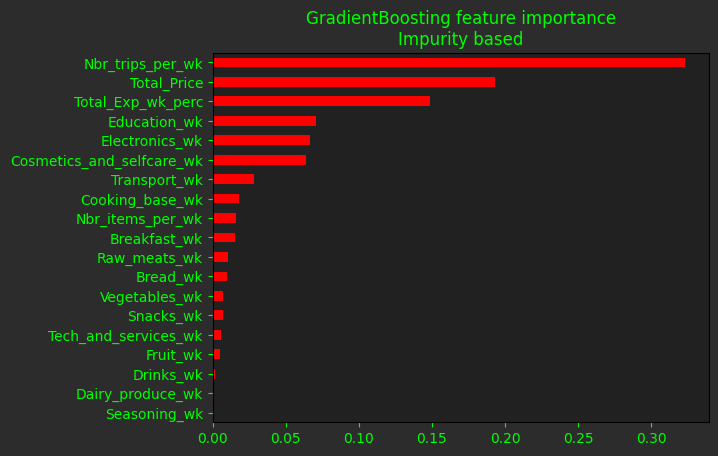

In [17]:
GBR_imp = pd.Series(GB_reg.feature_importances_, 
                    index=X_train.columns)

# plotting importance
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')


GBR_imp.nlargest(19).sort_values().plot(ax=ax,
                                        kind='barh', 
                                        color='red',
                                        title='GradientBoosting feature importance\nImpurity based')
plt.show()

<h3 style="color: green;">Exporting the best model from GridSearchCV</h3>
This is done for extracting feature importance list

In [63]:
joblib.dump(GB_reg, "../8. Models/Regressor_models/GB_reg_gridsearch_best_model")

['../8. Models/Regressor_models/GB_reg_gridsearch_best_model']